In [1]:
import numpy as np
import math
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/My Drive/data.pkl','rb') as f:
  data=pickle.load(f)
print(data.shape)
print(data)

(506, 6)
[[-1.2879095  -0.12001342 -1.45900038 -0.66660821 -0.14421743  1.85884913]
 [-0.59338101  0.36716642 -0.30309415 -0.98732948 -0.74026221  1.81901037]
 [-0.59338101 -0.26581176 -0.30309415 -0.98732948 -0.74026221  1.81989281]
 ...
 [ 0.11573841  0.79744934  1.17646583 -0.80321172  0.15812412  1.59974823]
 [ 0.11573841  0.73699637  1.17646583 -0.80321172  0.15812412  1.5997457 ]
 [ 0.11573841  0.43473151  1.17646583 -0.80321172  0.15812412  1.59957717]]


In [4]:
x=data[:,:5]
y=data[:,-1]
print("x shape: ",x.shape)
print("y shape: ",y.shape)

x shape:  (506, 5)
y shape:  (506,)


Task 1: Backpropogation and gradient checking

In [5]:
#sigmoid function
def sigmoid(z):
  sigmoid_cal = 1/(1+np.exp(-z))
  return sigmoid_cal

In [6]:
def forward_propagation(x,y,w):
  dicts={} #here
  exp = np.exp((((w[0]*x[0])+(w[1]*x[1]))*((w[0]*x[0])+(w[1]*x[1])))+w[5])
  tanh = np.tanh(exp+w[6])
  sig = sigmoid(((np.sin(w[2]*x[2]))*((w[3]*x[3])+(w[4]*x[4])))+w[7])
  dy_pred = tanh + sig*w[8]
  dl = -2*(y-dy_pred)  
  loss = pow(y-(tanh+sig*w[8]),2)
  dicts['exp'] = exp
  dicts['tanh'] = tanh
  dicts['sigmoid'] = sig
  dicts['dy_pred'] =dy_pred
  dicts['dl'] = dl
  dicts['loss'] = loss
  return dicts

In [7]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [8]:
'''def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
print(x[0],y[0],w)
d1=forward_propagation(x[0],y[0],w)
grader_forwardprop(d1)'''

"def grader_forwardprop(data):\n    dl = (data['dy_pred']==-1.9285278284819143)\n    loss=(data['loss']==0.9298048963072919)\n    part1=(data['exp']==1.1272967040973583)\n    part2=(data['tanh']==0.8417934192562146)\n    part3=(data['sigmoid']==0.5279179387419721)\n    assert(dl and loss and part1 and part2 and part3)\n    return True\nw=np.ones(9)*0.1\nprint(x[0],y[0],w)\nd1=forward_propagation(x[0],y[0],w)\ngrader_forwardprop(d1)"

Backward propagation:

In [9]:
def backward_prop(x,y,dicts):
  dv = {}
  dw1 = dicts['dl']*(1-(math.pow(dicts['tanh'],2)))*dicts['exp']*2*((w[0]*x[0])+(w[1]*x[1]))*x[0]
  dw2 = dicts['dl']*(1-(math.pow(dicts['tanh'],2)))*dicts['exp']*2*((w[0]*x[0])+(w[1]*x[1]))*x[1]
  dw3 = dicts['dl']*(dicts['sigmoid']*(1-dicts['sigmoid']))*w[8]*((w[3]*x[3])+(w[4]*x[4]))*math.cos(x[2]*w[2])*x[2]
  dw4 = dicts['dl']*(dicts['sigmoid']*(1-dicts['sigmoid']))*w[8]*math.sin(x[2]*w[2])*x[3]
  dw5 = dicts['dl']*(dicts['sigmoid']*(1-dicts['sigmoid']))*w[8]*math.sin(x[2]*w[2])*x[4]
  dw6 = dicts['dl']*(1-(math.pow(dicts['tanh'],2)))*dicts['exp']
  dw7 = dicts['dl']*(1-(math.pow(dicts['tanh'],2)))
  dw8 = dicts['dl']*(dicts['sigmoid']*(1-dicts['sigmoid']))*w[8]
  dw9 = dicts['dl']*dicts['sigmoid']

  dv['dw1'] = dw1
  dv['dw2'] = dw2
  dv['dw3'] = dw3
  dv['dw4'] = dw4
  dv['dw5'] = dw5
  dv['dw6'] = dw6
  dv['dw7'] = dw7
  dv['dw8'] = dw8
  dv['dw9'] = dw9
  return dv

Grader functions - 3

In [11]:
'''def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True '''
w=np.ones(9)*0.1
forward_dict=forward_propagation(x[0],y[0],w)
backward_dict=backward_prop(x[0],y[0],forward_dict)
#grader_backprop(backward_dict)

Implement Gradient Checking

In [13]:
w = np.ones(9)*0.1

In [14]:
def grad_checking(data_point,y,w,epsilon=1e-7):
  weight = w
  loss = forward_propagation(data_point,y,w)
  grad = backward_prop(data_point,w,loss)
  apprx_gradients = []
  grad_check = []
  for i in range(len(w)):
    w = np.ones(9)*0.1
    w[i]=weight[i]+epsilon
    l1 = forward_propagation(data_point,y,w)
    loss1 = l1['loss']
    w[i] = weight[i]-epsilon
    l2 = forward_propagation(data_point,y,w)
    loss2 = l2['loss']
    apprx = (loss1 - loss2)/2*epsilon
    apprx_gradients.append(apprx)
    numerator = np.linalg.norm(grad[(str('dw')+str(i+1))] - apprx)
    denominator = np.linalg.norm(grad[(str('dw')+str(i+1))]) + np.linalg.norm(apprx)
    difference = numerator/denominator
    grad_check.append(difference) 
  return grad_check,apprx_gradients   


In [15]:
print("gradient using back propagation:")
loss = forward_propagation(x[0],y[0],w)
backward_prop(x[0],w,loss)

gradient using back propagation:


{'dw1': -0.22973323498702,
 'dw2': -0.02140761471775293,
 'dw3': -0.00562540558026632,
 'dw4': -0.004657941222712424,
 'dw5': -0.0010077228498574248,
 'dw6': -0.6334751873437471,
 'dw7': -0.561941842854033,
 'dw8': -0.04806288407316517,
 'dw9': -1.0181044360187037}

In [16]:
diff,apprx_grad = grad_checking(x[0],y[0],w,epsilon=1e-7)
print("approxiamate gradient after gradient checking")
print(apprx_grad)
print('difference')
print(diff)
#correct the difference values

approxiamate gradient after gradient checking
[-2.2973323521302548e-15, -2.1407614569923792e-16, -5.625406251930087e-17, -4.6579412549263567e-17, -1.0077233492111758e-17, -6.334751878611655e-15, -5.61941842502911e-15, -4.806288422809501e-16, -1.0181044357571167e-14]
difference
[0.9999999999999799, 0.9999999999999799, 0.9999999999999799, 0.9999999999999799, 0.9999999999999802, 0.99999999999998, 0.9999999999999798, 0.9999999999999801, 0.9999999999999799]


In [19]:
'''def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= grad_checking(x[0],y[0],w,eps)
grader_grad_check(value)'''

'def grader_grad_check(value):\n    print(value)\n    assert(np.all(value <= 10**-3))\n    return True \n\nw=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,\n   0.00114524,  0.00684168,  0.02242521,  0.01296444]\n\neps=10**-7\nvalue= grad_checking(x[0],y[0],w,eps)\ngrader_grad_check(value)'

Task 2 - Optimizers

Algo for vanilla weights

In [20]:
from sklearn.metrics import mean_squared_error
rate = 0.001
mu=0
sigma = 0.01
w = np.random.normal(mu,sigma,9)
weight = w

In [21]:
loss_val_vanilla = []
epoch_vanilla = []
for epoch in range(100):
  epoch_vanilla.append(epoch)
  y_pred = []
  for point in range(len(data)):
    forward = forward_propagation(x[point],y[point],w)
    y_pred.append(forward['dy_pred'])
    backward = backward_prop(x[point],w,forward)
    w[0] = w[0]-rate*backward['dw1']
    w[1] = w[1]-rate*backward['dw2']
    w[2] = w[2]-rate*backward['dw3']
    w[3] = w[3]-rate*backward['dw4']
    w[4] = w[4]-rate*backward['dw5']
    w[5] = w[5]-rate*backward['dw6']
    w[6] = w[6]-rate*backward['dw7']
    w[7] = w[7]-rate*backward['dw8']
    w[8] = w[8]-rate*backward['dw9']

  loss=mean_squared_error(y,y_pred)
  loss_val_vanilla.append(loss)      

Plot of epochs vs loss

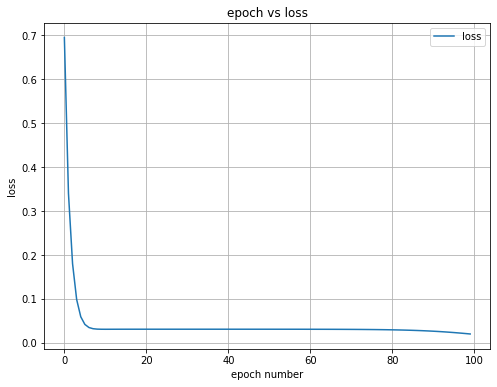

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_vanilla,loss_val_vanilla,label='loss')
plt.title('epoch vs loss')
plt.xlabel("epoch number")
plt.ylabel("loss")
plt.legend()

Algorithm for momentum

In [23]:
from sklearn.metrics import mean_squared_error
rate = 0.001
m = np.zeros(9)
b = .9
mu = 0
sigma = 0.01
w = np.random.normal(mu,sigma,9)
weight = w

In [24]:
loss_val_momentum = []
epoch_momentum =[]
for epoch in range(100):
  epoch_momentum.append(epoch)
  y_pred = []
  for point in range(len(data)):
    forward = forward_propagation(x[point],y[point],w)
    y_pred.append(forward['dy_pred'])
    backward = backward_prop(x[point],w,forward)
    m[0] = b*m[0]+(1-b)*backward['dw1']
    w[0] = w[0]-rate*m[0]
    m[1] = b*m[1]+(1-b)*backward['dw2']
    w[1] = w[1]-rate*m[1]
    m[1] = b*m[2]+(1-b)*backward['dw3']
    w[1] = w[2]-rate*m[2]
    m[1] = b*m[3]+(1-b)*backward['dw4']
    w[1] = w[3]-rate*m[3]
    m[1] = b*m[4]+(1-b)*backward['dw5']
    w[1] = w[4]-rate*m[4]
    m[1] = b*m[5]+(1-b)*backward['dw6']
    w[1] = w[5]-rate*m[5]
    m[1] = b*m[6]+(1-b)*backward['dw7']
    w[1] = w[6]-rate*m[6]
    m[1] = b*m[7]+(1-b)*backward['dw8']
    w[1] = w[7]-rate*m[7]
    m[1] = b*m[8]+(1-b)*backward['dw9']
    w[1] = w[8]-rate*m[8]

  loss=mean_squared_error(y,y_pred)
  loss_val_momentum.append(loss)  
    

plot epochs vs loss

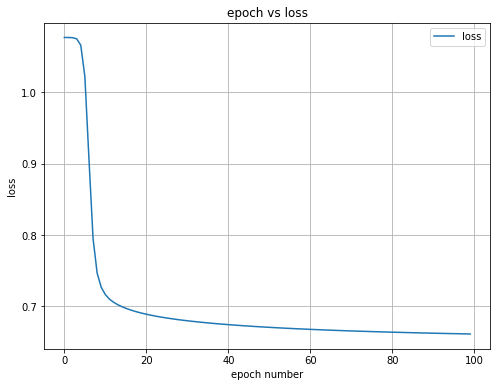

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_momentum,loss_val_momentum,label='loss')
plt.title('epoch vs loss')
plt.xlabel("epoch number")
plt.ylabel("loss")
plt.legend()

Algo of Adam update weights

In [26]:
rate =0.001
m = np.zeros(9)
n = np.zeros(9)
b1 = 0.9
b2 = 0.999
z= 1e-8
mu = 0
sigma = 0.01
w = np.random.normal(mu,sigma,9)

In [27]:
loss_val_adam = []
epoch_adam = []
for epoch in range(100):
  epoch_adam.append(epoch)
  y_pred = []
  for point in range(len(data)):
    forward = forward_propagation(x[point],y[point],w)
    y_pred.append(forward['dy_pred'])
    backward = backward_prop(x[point],w,forward)
    m[0] = b1*m[0] + (1-b1)*backward['dw1']
    mt = m[0]/(1-b1)
    n[0] = b2*n[0]+(1-b2)*math.pow(backward['dw1'],2)
    vt = n[0]/(1-b2)
    w[0] = w[0]-(rate/(math.sqrt(vt)+z))*mt
    m[1] = b1*m[1] + (1-b1)*backward['dw2']
    mt = m[1]/(1-b1)
    n[1] = b2*n[1]+(1-b2)*math.pow(backward['dw2'],2)
    vt = n[1]/(1-b2)
    w[1] = w[1]-(rate/(math.sqrt(vt)+z))*mt
    m[2] = b1*m[2] + (1-b1)*backward['dw3']
    mt = m[2]/(1-b1)
    n[2] = b2*n[2]+(1-b2)*math.pow(backward['dw3'],2)
    vt = n[2]/(1-b2)
    w[2] = w[2]-(rate/(math.sqrt(vt)+z))*mt
    m[3] = b1*m[3] + (1-b1)*backward['dw4']
    mt = m[3]/(1-b1)
    n[3] = b2*n[3]+(1-b2)*math.pow(backward['dw4'],2)
    vt = n[3]/(1-b2)
    w[3] = w[3]-(rate/(math.sqrt(vt)+z))*mt
    m[4] = b1*m[4] + (1-b1)*backward['dw5']
    mt = m[4]/(1-b1)
    n[4] = b2*n[4]+(1-b2)*math.pow(backward['dw5'],2)
    vt = n[4]/(1-b2)
    w[4] = w[4]-(rate/(math.sqrt(vt)+z))*mt
    m[5] = b1*m[5] + (1-b1)*backward['dw6']
    mt = m[5]/(1-b1)
    n[5] = b2*n[5]+(1-b2)*math.pow(backward['dw6'],2)
    vt = n[5]/(1-b2)
    w[5] = w[5]-(rate/(math.sqrt(vt)+z))*mt
    m[6] = b1*m[6] + (1-b1)*backward['dw7']
    mt = m[6]/(1-b1)
    n[6] = b2*n[6]+(1-b2)*math.pow(backward['dw7'],2)
    vt = n[6]/(1-b2)
    w[6] = w[6]-(rate/(math.sqrt(vt)+z))*mt
    m[7] = b1*m[7] + (1-b1)*backward['dw8']
    mt = m[7]/(1-b1)
    n[7] = b2*n[7]+(1-b2)*math.pow(backward['dw8'],2)
    vt = n[7]/(1-b2)
    w[7] = w[7]-(rate/(math.sqrt(vt)+z))*mt
    m[8] = b1*m[8] + (1-b1)*backward['dw9']
    mt = m[8]/(1-b1)
    n[8] = b2*n[8]+(1-b2)*math.pow(backward['dw9'],2)
    vt = n[8]/(1-b2)
    w[8] = w[8]-(rate/(math.sqrt(vt)+z))*mt

  loss = mean_squared_error(y,y_pred)
  loss_val_adam.append(loss)  

Plot epochs vs loss

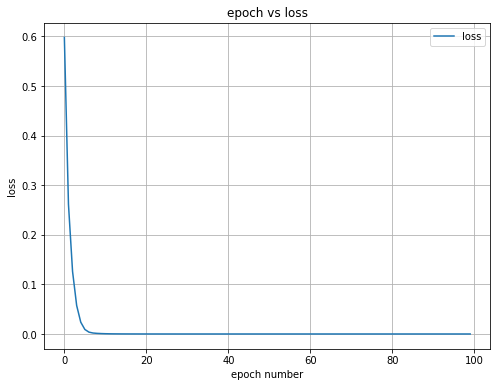

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_adam,loss_val_adam,label='loss')
plt.title('epoch vs loss')
plt.xlabel("epoch number")
plt.ylabel("loss")
plt.legend()

Comparision plot of different optimizers

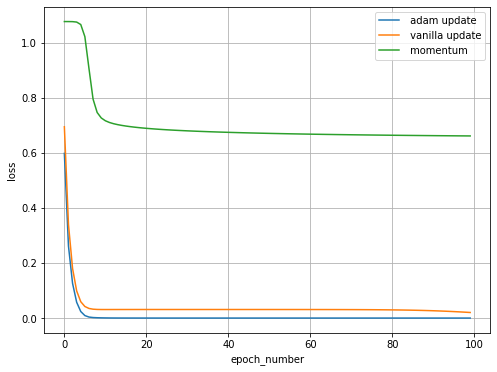

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_adam,loss_val_adam, label=' adam update')
plt.plot(epoch_vanilla,loss_val_vanilla, label=' vanilla update')
plt.plot(epoch_momentum,loss_val_momentum, label=' momentum')
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()